In [ ]:
!pip install nltk --quiet
!pip install pip install scikit-learn --quiet
!pip install gensim --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install wordcloud --quiet
!pip install textblob --quiet

1 Load Data

In [1]:
import json

# Load spam and ham emails
with open('spam_emails.json', 'r') as file:
    spam_emails = json.load(file)

with open('ham_emails.json', 'r') as file:
    ham_emails = json.load(file)


1.2 Text Preprocessing

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text_lementization(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs, symbols, and numbers
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)


# Function with stemming instead of lemmatization
def preprocess_text_with_stemming(text):
    # Convert to lowercase, remove URLs, symbols, and numbers, and tokenize (reuse existing steps)
    tokens = word_tokenize(re.sub(r'[^a-z\s]', '', re.sub(r'<.*?>+', '', re.sub(r'https?://\S+|www\.\S+', '', text.lower()))))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

# Function that keeps stopwords
def preprocess_text_keep_stopwords(text):
    # Convert to lowercase, remove URLs, symbols, and numbers, and tokenize (reuse existing steps)
    tokens = word_tokenize(re.sub(r'[^a-z\s]', '', re.sub(r'<.*?>+', '', re.sub(r'https?://\S+|www\.\S+', '', text.lower()))))
    # Lemmatize without removing stopwords
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

# Preprocess spam and ham emails
spam_emails_lem = [preprocess_text_lementization(email) for email in spam_emails]
ham_emails_lem = [preprocess_text_lementization(email) for email in ham_emails]

spam_emails_stem = [preprocess_text_with_stemming(email) for email in spam_emails]
ham_emails_stem = [preprocess_text_with_stemming(email) for email in ham_emails]

spam_emails_keep_stopwords = [preprocess_text_keep_stopwords(email) for email in spam_emails]
ham_emails_keep_stopwords = [preprocess_text_keep_stopwords(email) for email in ham_emails]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2. Exploratory Data Analysis (EDA)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


most_common_words [('ect', 13908), ('subject', 8063), ('hou', 7289), ('enron', 6555), ('com', 3710), ('deal', 3635), ('please', 3200), ('gas', 3036), ('meter', 2716), ('cc', 2391), ('pm', 2343), ('hpl', 2318), ('e', 1991), ('daren', 1901), ('thanks', 1898), ('need', 1846), ('corp', 1776), ('volume', 1690), ('know', 1611), ('day', 1549), ('price', 1524), ('new', 1437), ('company', 1432), ('may', 1384), ('u', 1360), ('mmbtu', 1349), ('j', 1337), ('get', 1321), ('forwarded', 1297), ('l', 1285), ('http', 1242), ('see', 1211), ('let', 1183), ('contract', 1169), ('farmer', 1156), ('information', 1155), ('change', 1147), ('time', 1109), ('month', 1098), ('attached', 1097)]


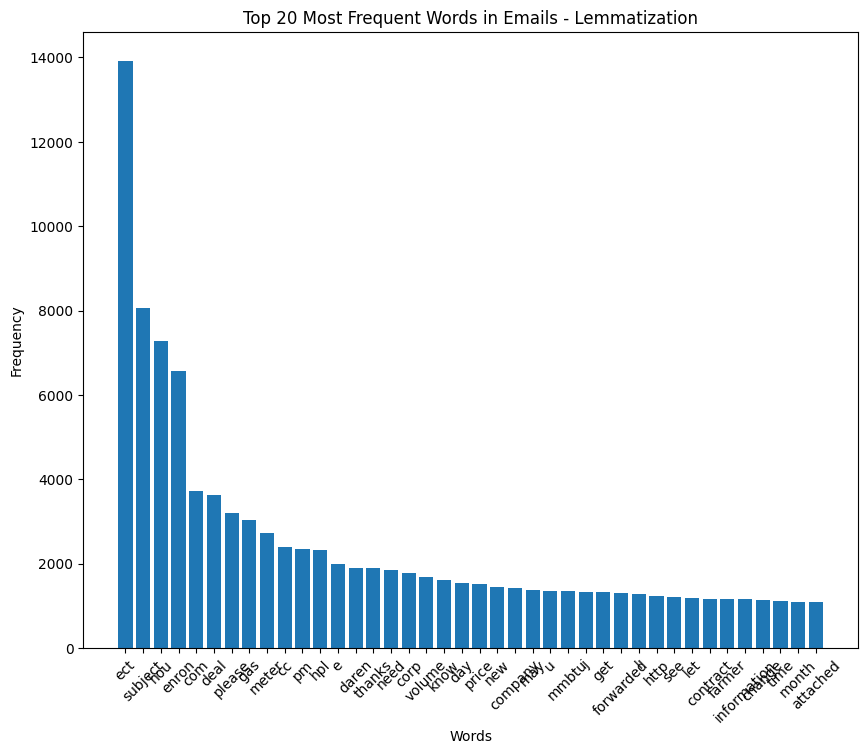

most_common_words [('ect', 13908), ('subject', 8065), ('hou', 7289), ('enron', 6555), ('com', 3710), ('deal', 3655), ('pleas', 3245), ('ga', 3072), ('meter', 2721), ('cc', 2391), ('pm', 2343), ('hpl', 2318), ('thank', 2305), ('need', 2081), ('e', 1969), ('daren', 1901), ('forward', 1833), ('price', 1813), ('corp', 1776), ('volum', 1691), ('know', 1618), ('day', 1549), ('get', 1504), ('new', 1437), ('compani', 1432), ('mmbtu', 1408), ('product', 1403), ('may', 1384), ('chang', 1354), ('j', 1336), ('inform', 1296), ('http', 1242), ('see', 1228), ('attach', 1195), ('let', 1187), ('nom', 1186), ('contract', 1183), ('time', 1169), ('farmer', 1156), ('l', 1099)]


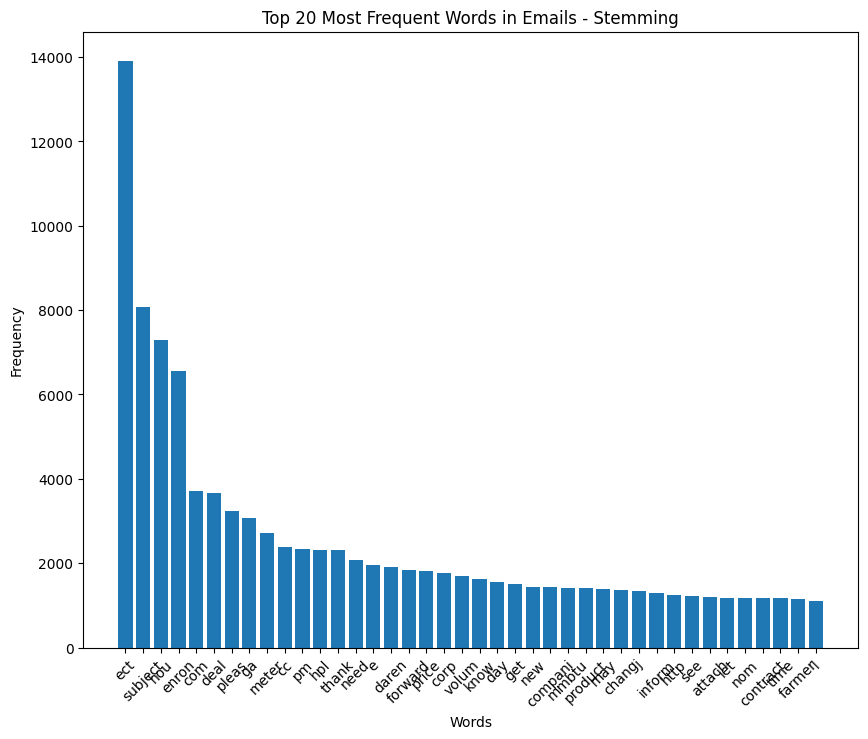

most_common_words [('the', 25656), ('to', 20345), ('ect', 13908), ('a', 12977), ('and', 12829), ('for', 10508), ('of', 10188), ('you', 8162), ('subject', 8063), ('in', 7721), ('on', 7312), ('hou', 7289), ('this', 7171), ('is', 7170), ('enron', 6555), ('i', 6392), ('be', 5071), ('that', 4769), ('we', 4340), ('from', 4192), ('will', 4139), ('have', 4097), ('your', 4042), ('with', 3987), ('it', 3862), ('at', 3736), ('com', 3710), ('deal', 3635), ('s', 3437), ('are', 3388), ('please', 3200), ('if', 3135), ('or', 3079), ('not', 3074), ('gas', 3036), ('by', 3000), ('meter', 2716), ('me', 2570), ('am', 2532), ('cc', 2391)]


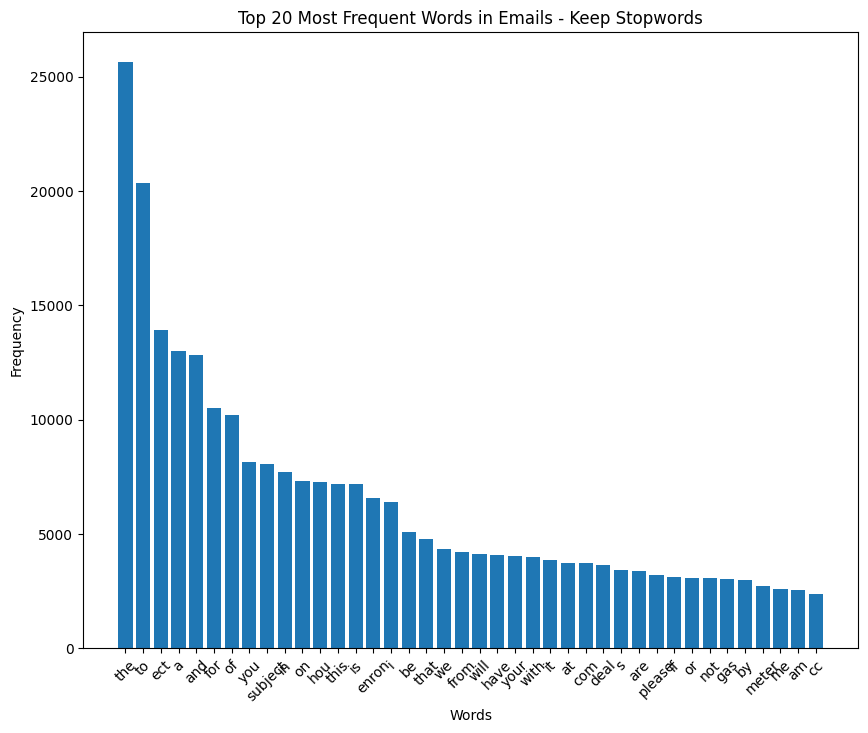

most_common_words [('subject', 1658), ('com', 993), ('http', 984), ('company', 921), ('u', 753), ('price', 716), ('e', 653), ('www', 587), ('information', 521), ('font', 515), ('email', 512), ('td', 504), ('get', 499), ('statement', 497), ('please', 485), ('stock', 466), ('new', 434), ('may', 423), ('nbsp', 418), ('time', 410), ('security', 410), ('one', 405), ('p', 389), ('product', 389), ('c', 366), ('height', 363), ('pill', 357), ('investment', 320), ('r', 316), ('size', 316), ('free', 314), ('within', 313), ('message', 313), ('width', 306), ('service', 297), ('b', 296), ('money', 295), ('report', 295), ('business', 293), ('offer', 277)]


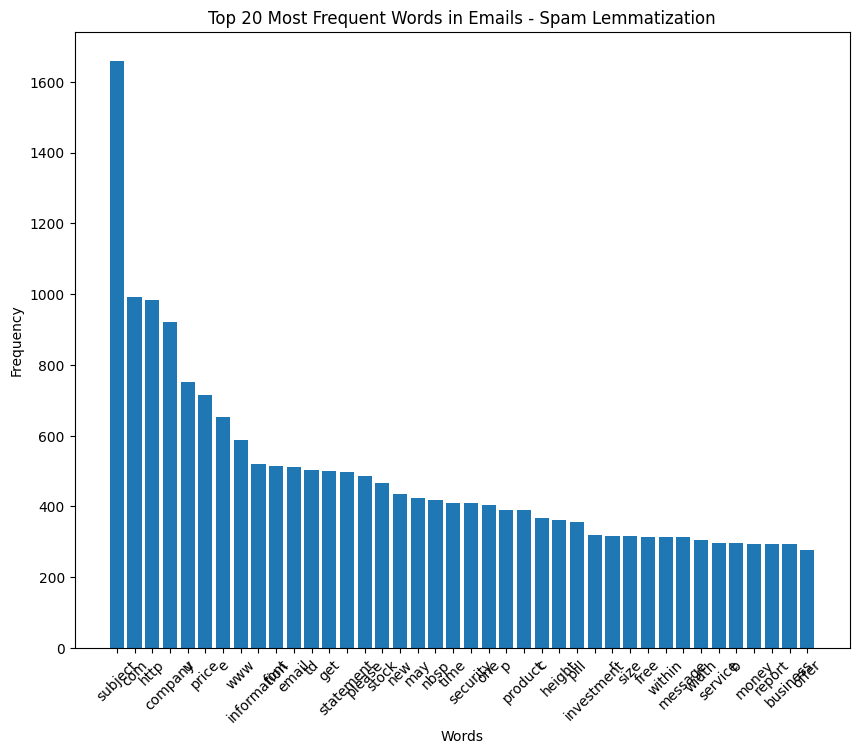

most_common_words [('ect', 13897), ('hou', 7281), ('enron', 6555), ('subject', 6405), ('deal', 3534), ('gas', 2861), ('com', 2717), ('please', 2715), ('meter', 2713), ('cc', 2379), ('pm', 2325), ('hpl', 2318), ('daren', 1901), ('thanks', 1813), ('corp', 1710), ('volume', 1667), ('need', 1578), ('know', 1452), ('mmbtu', 1349), ('e', 1338), ('j', 1300), ('forwarded', 1296), ('day', 1292), ('farmer', 1139), ('contract', 1120), ('l', 1100), ('let', 1100), ('attached', 1083), ('change', 1050), ('xl', 1035), ('see', 1020), ('new', 1003), ('may', 961), ('month', 937), ('robert', 891), ('would', 875), ('question', 867), ('sitara', 861), ('nom', 831), ('ticket', 827)]


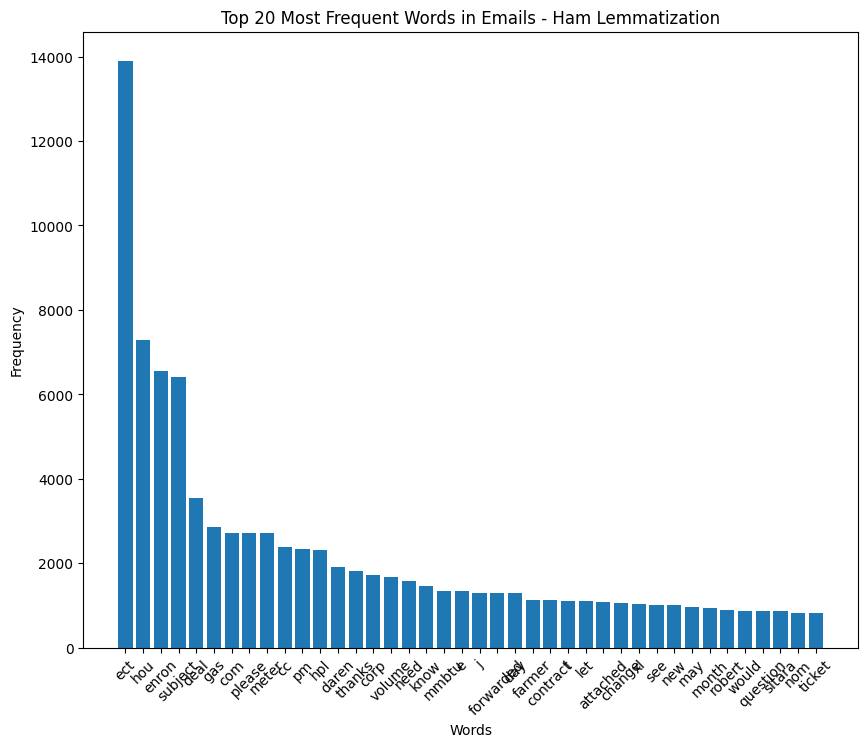

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
from nltk import bigrams, FreqDist

# Ensure you've downloaded the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Combine processed emails for EDA
emails_lem = spam_emails_lem + ham_emails_lem
emails_stem = spam_emails_stem + ham_emails_stem
emails_keep_stopwords = spam_emails_keep_stopwords + ham_emails_keep_stopwords

# Function to plot most common words
def plot_most_common_words(emails, title):
    all_words = ' '.join(emails).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(40)
    print("most_common_words", most_common_words)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.title(f'Top 20 Most Frequent Words in Emails - {title}')
    plt.show()

# Plotting for each preprocessing strategy
plot_most_common_words(emails_lem, "Lemmatization")
plot_most_common_words(emails_stem, "Stemming")
plot_most_common_words(emails_keep_stopwords, "Keep Stopwords")
plot_most_common_words(spam_emails_lem, "Spam Lemmatization")
plot_most_common_words(ham_emails_lem, "Ham Lemmatization")


bigram_strings ['hou ect', 'ect ect', 'enron enron', 'ect cc', 'corp enron', 'cc subject', 'daren j', 'let know', 'enron com', 'j farmer', 'ect subject', 'e mail', 'see attached', 'ect pm', 'farmer hou', 'http www', 'attached file', 'xl subject', 'please let', 'original message']


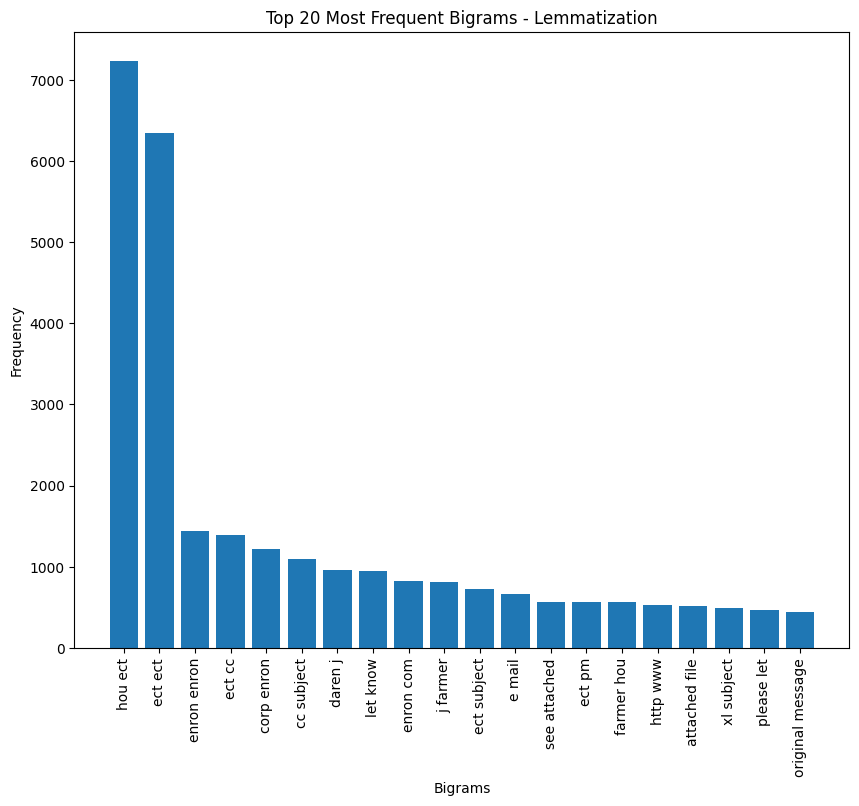

bigram_strings ['hou ect', 'ect ect', 'enron enron', 'ect cc', 'corp enron', 'cc subject', 'daren j', 'let know', 'enron com', 'j farmer', 'ect subject', 'e mail', 'see attach', 'ect pm', 'farmer hou', 'http www', 'attach file', 'xl subject', 'pleas let', 'origin messag']


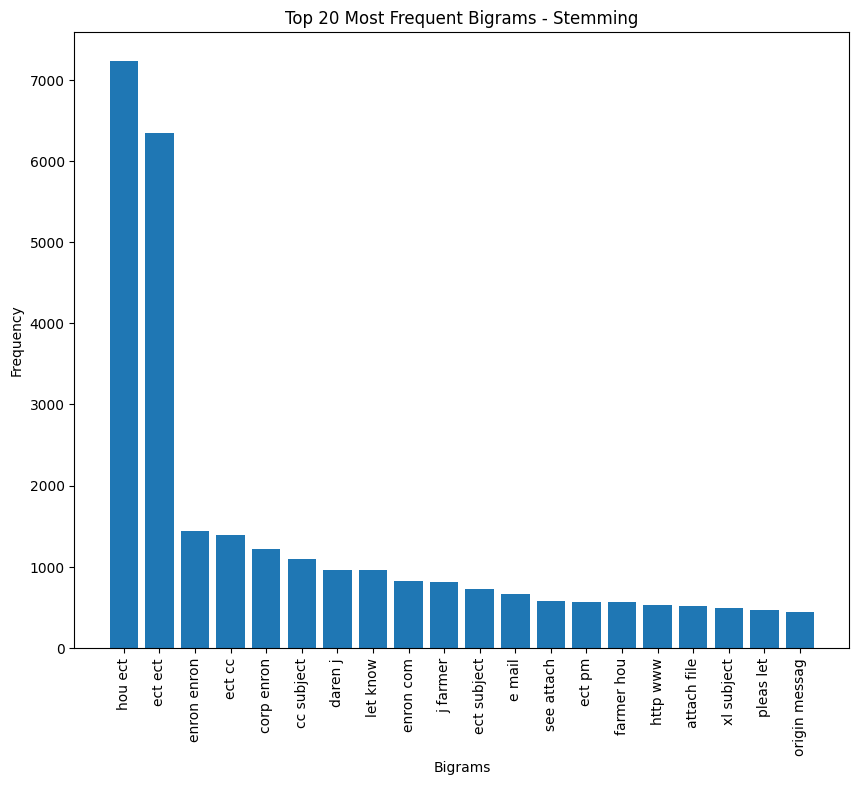

bigram_strings ['hou ect', 'ect ect', 'of the', 'in the', 'subject re', 'if you', 'for the', 'enron enron', 'on the', 'ect cc', 'will be', 'pm to', 'to the', 'forwarded by', 'corp enron', 'am to', 'cc subject', 'to be', 'you have', 'need to']


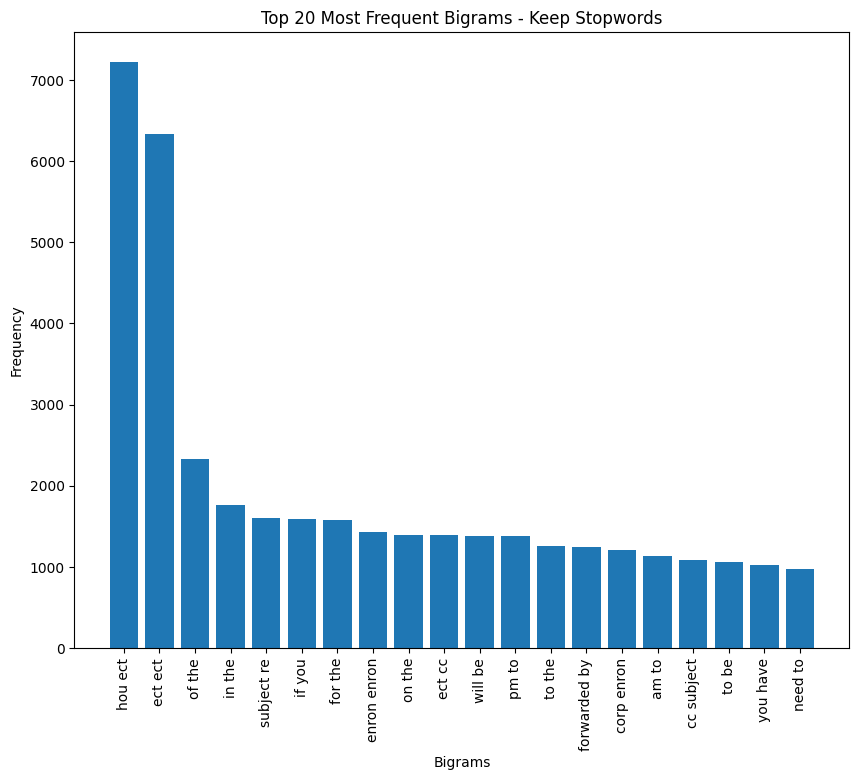

bigram_strings ['http www', 'nbsp nbsp', 'computron com', 'href http', 'looking statement', 'pill pill', 'width height', 'src http', 'www computron', 'forward looking', 'http nd', 'td td', 'e mail', 'investment advice', 'font size', 'td tr', 'tr td', 'align center', 'size pt', 'window xp']


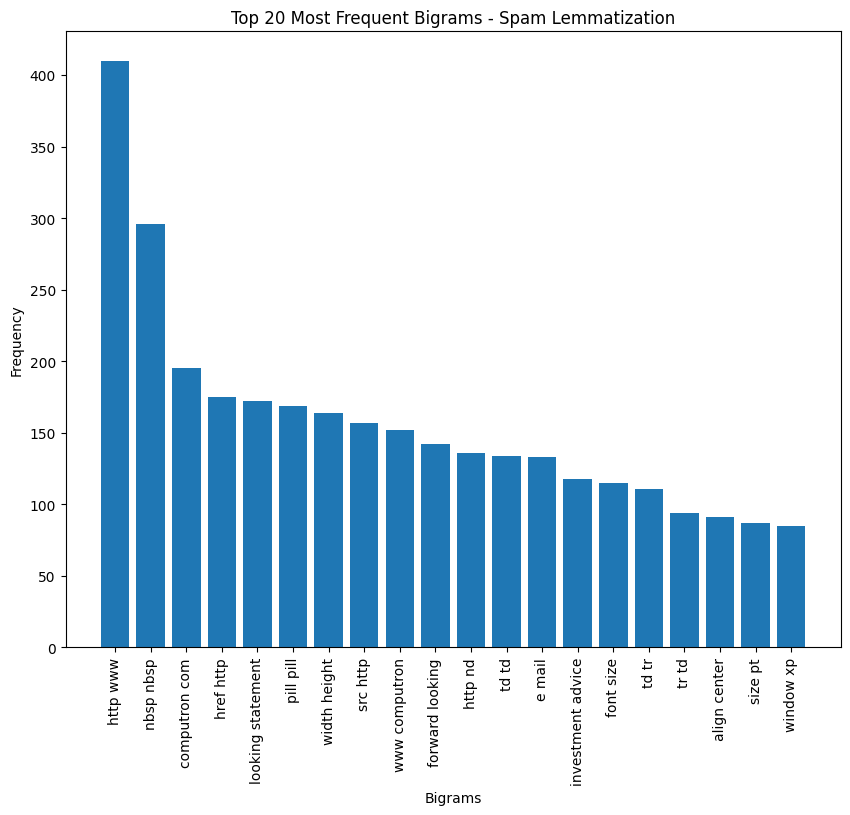

bigram_strings ['hou ect', 'ect ect', 'enron enron', 'ect cc', 'corp enron', 'cc subject', 'daren j', 'let know', 'enron com', 'j farmer', 'ect subject', 'see attached', 'ect pm', 'farmer hou', 'e mail', 'attached file', 'xl subject', 'please let', 'original message', 'subject meter']


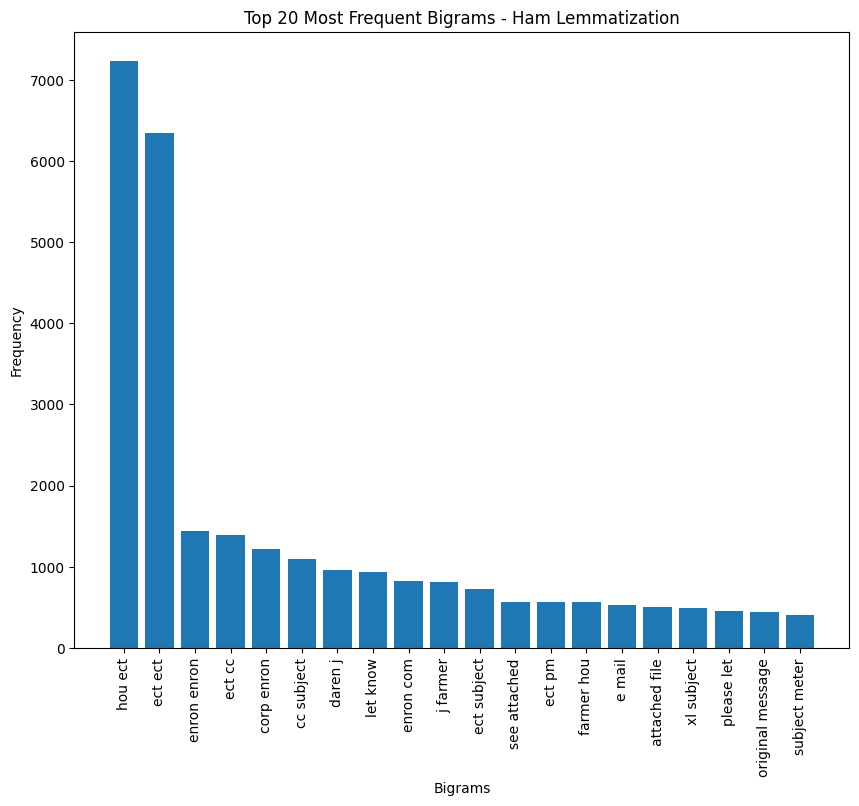

In [18]:
# Function to plot bigram frequencies
def plot_bigram_frequencies(emails, title):
    all_words = ' '.join(emails).split()
    bigram_freq = FreqDist(bigrams(all_words))
    most_common_bigrams = bigram_freq.most_common(20)
    bigram_strings = [' '.join(bigram) for bigram, count in most_common_bigrams]
    counts = [count for bigram, count in most_common_bigrams]
    print("bigram_strings", bigram_strings)
    plt.figure(figsize=(10, 8))
    plt.bar(bigram_strings, counts)
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Most Frequent Bigrams - {title}')
    plt.show()

# Plotting for each preprocessing strategy
plot_bigram_frequencies(emails_lem, "Lemmatization")
plot_bigram_frequencies(emails_stem, "Stemming")
plot_bigram_frequencies(emails_keep_stopwords, "Keep Stopwords")
plot_bigram_frequencies(spam_emails_lem, "Spam Lemmatization")
plot_bigram_frequencies(ham_emails_lem, "Ham Lemmatization")

Word Cloud

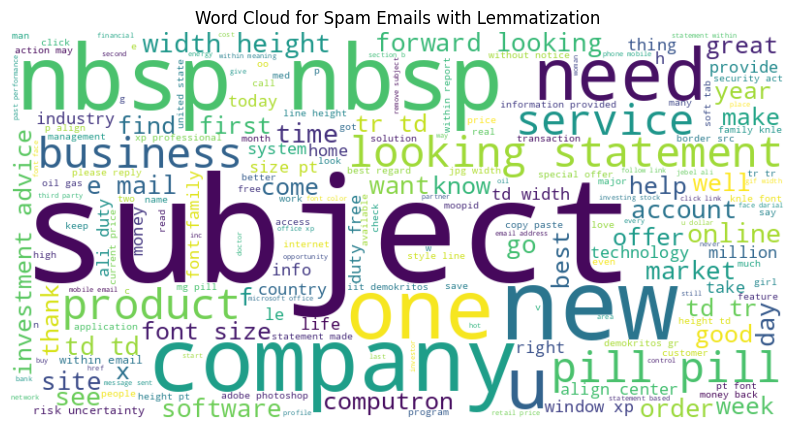

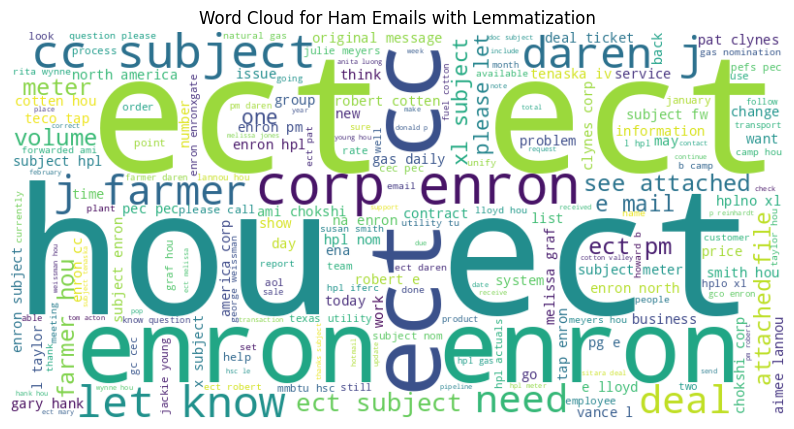

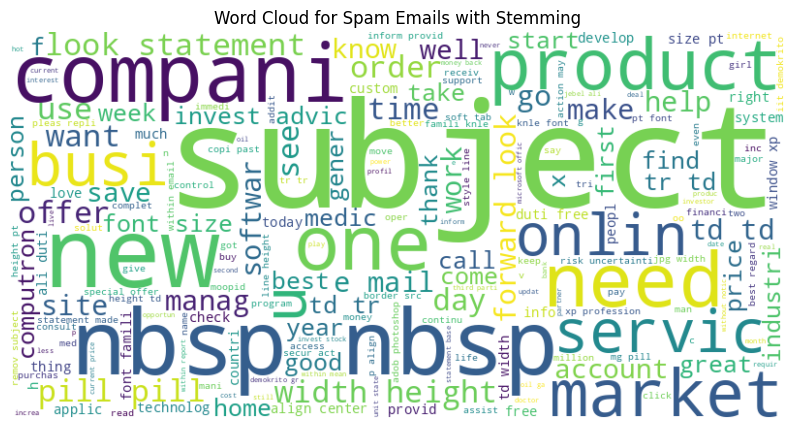

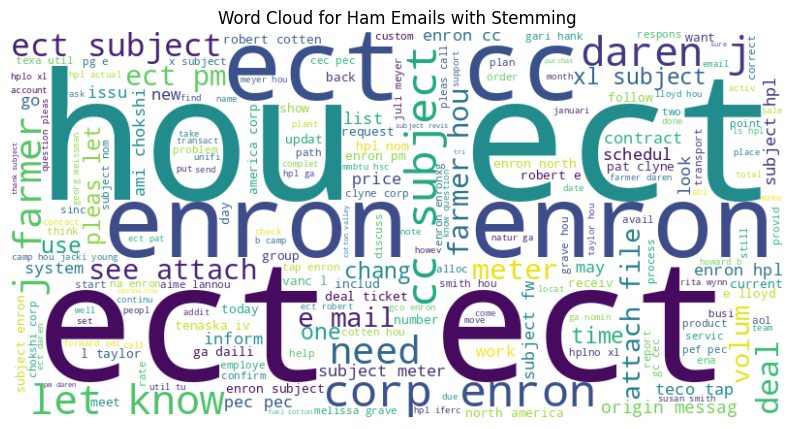

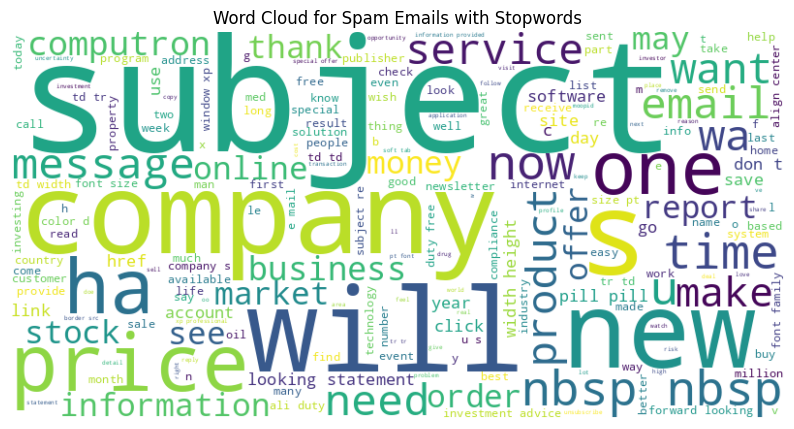

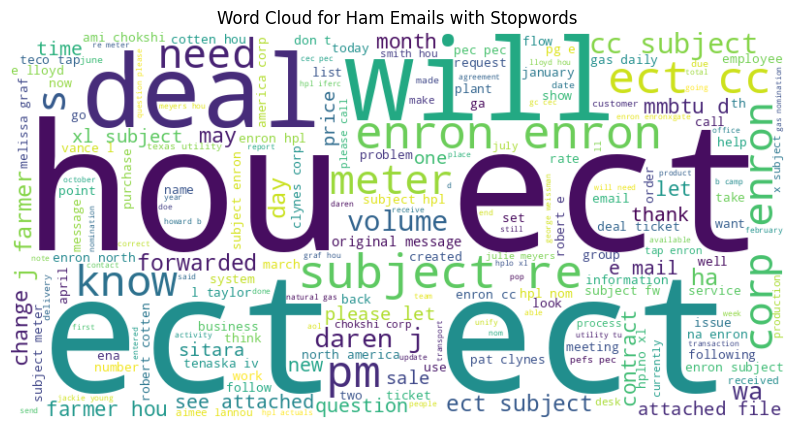

In [19]:
from wordcloud import WordCloud, STOPWORDS

def generate_word_cloud(emails, title):
    text = ' '.join(emails)
    wordcloud = WordCloud(width=800, height=400, background_color ='white', max_words=200).generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_word_cloud(spam_emails_lem, "Word Cloud for Spam Emails with Lemmatization")
generate_word_cloud(ham_emails_lem, "Word Cloud for Ham Emails with Lemmatization")
generate_word_cloud(spam_emails_stem, "Word Cloud for Spam Emails with Stemming")
generate_word_cloud(ham_emails_stem, "Word Cloud for Ham Emails with Stemming")
generate_word_cloud(spam_emails_keep_stopwords, "Word Cloud for Spam Emails with Stopwords")
generate_word_cloud(ham_emails_keep_stopwords, "Word Cloud for Ham Emails with Stopwords")


POS Tag distribution

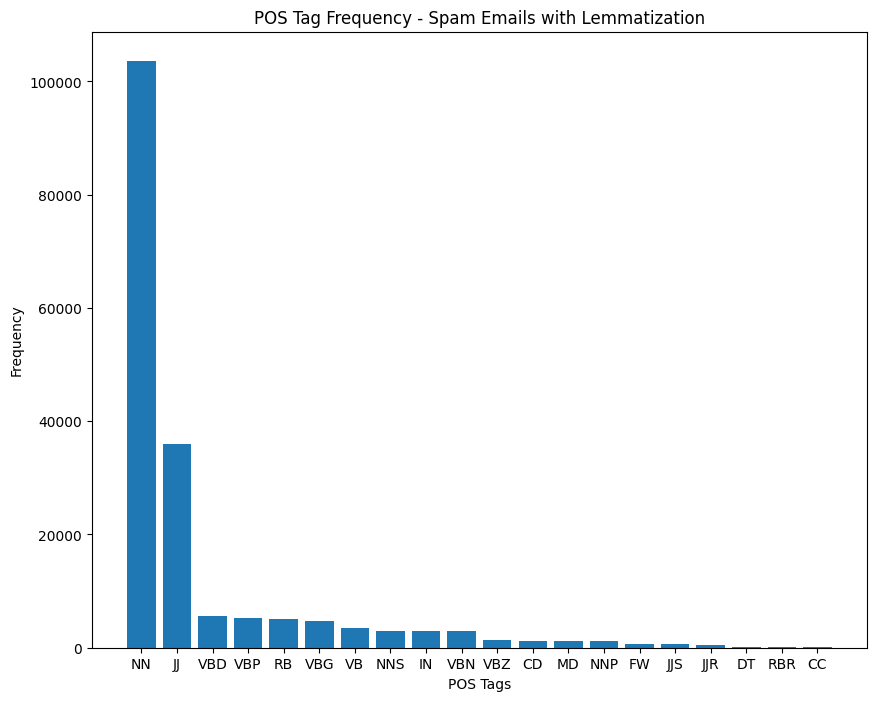

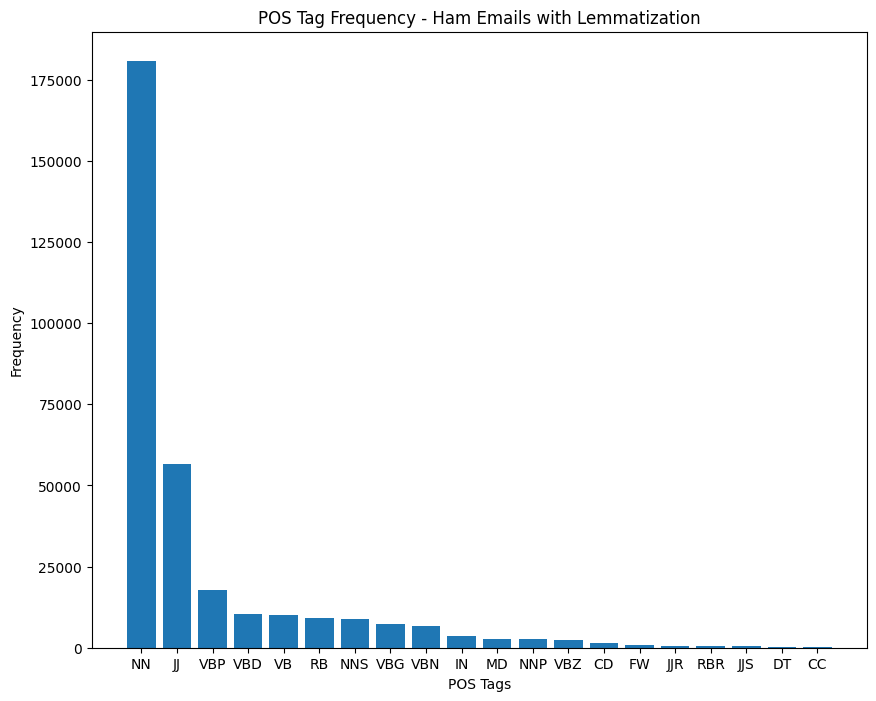

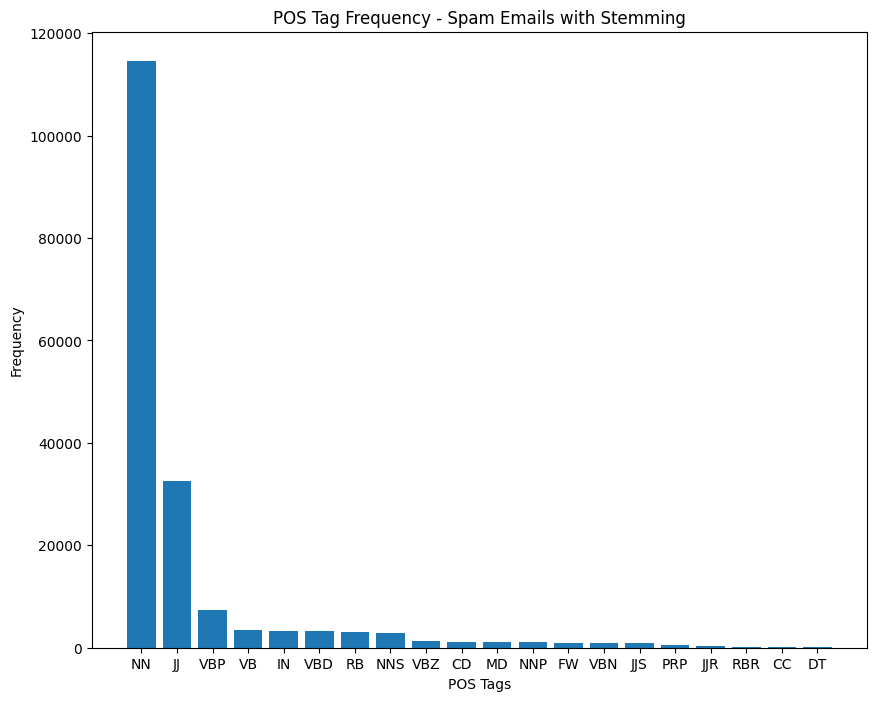

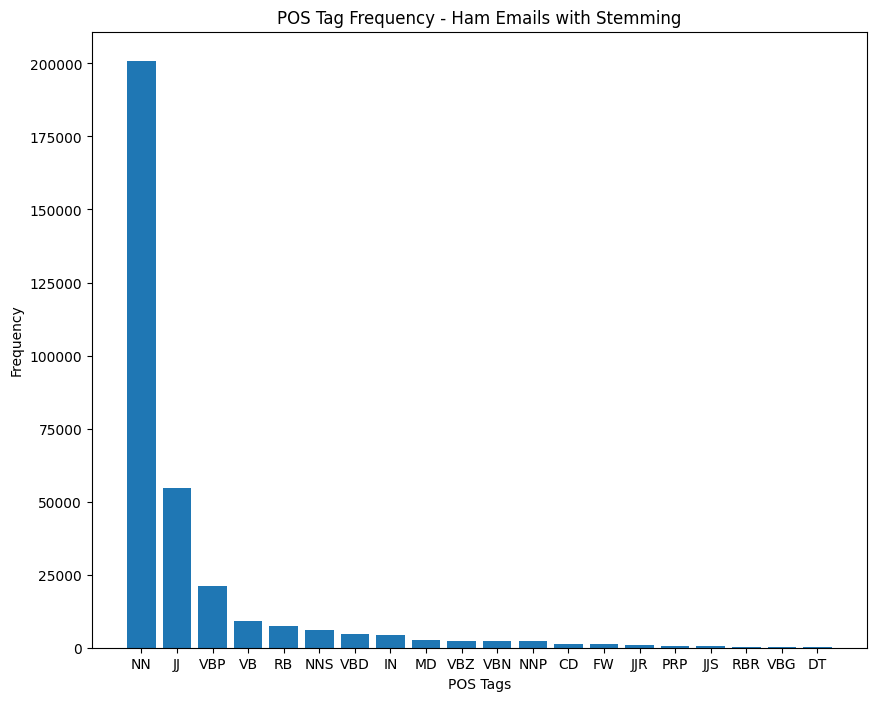

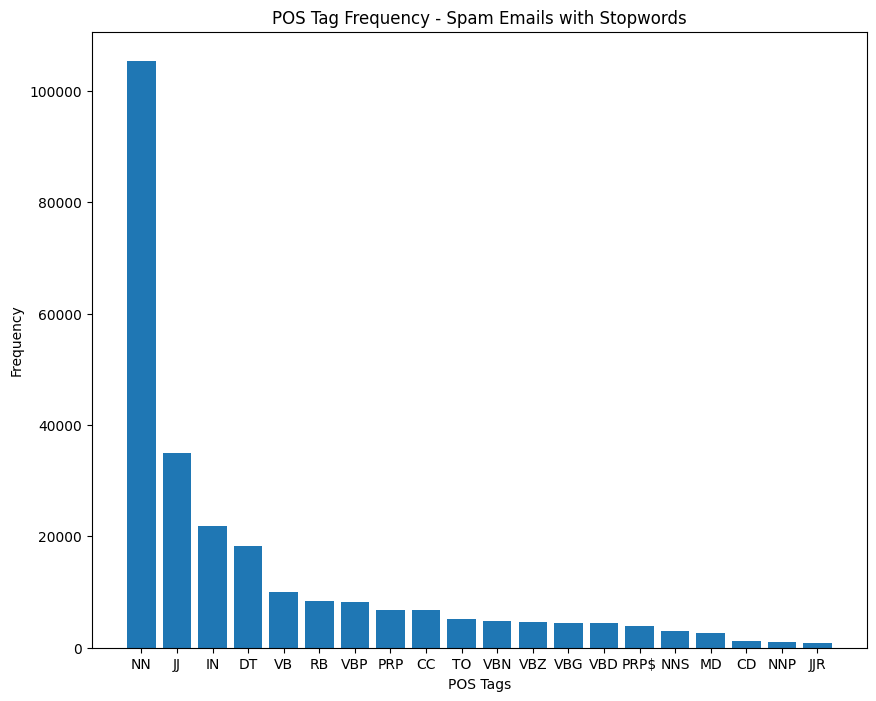

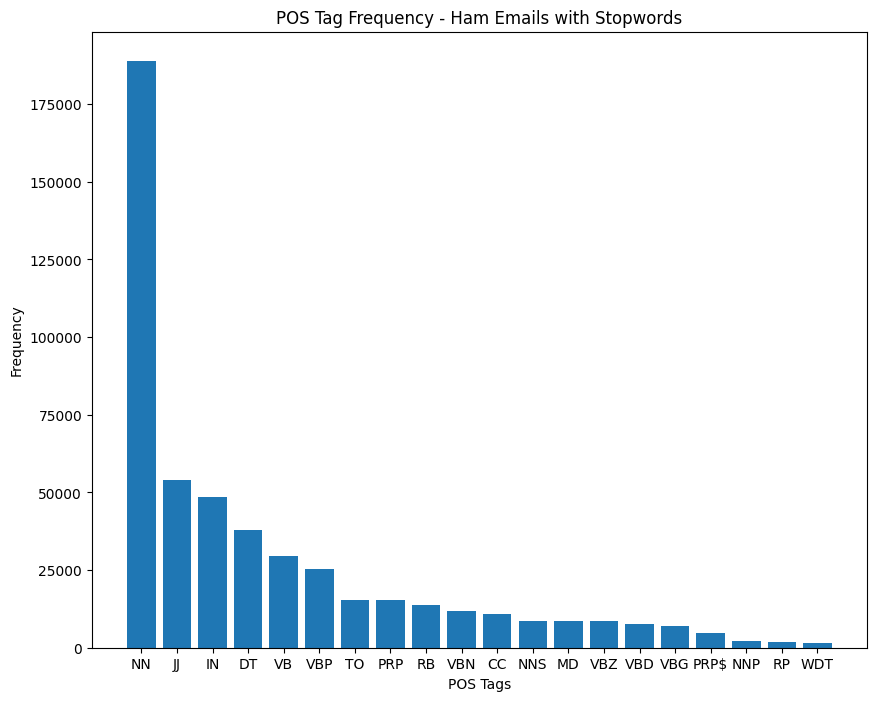

In [20]:
from nltk import pos_tag

def plot_pos_tags(emails, title):
    tokens = word_tokenize(' '.join(emails))
    tags = [tag for _, tag in pos_tag(tokens)]
    tag_freq = FreqDist(tags)
    
    tags, counts = zip(*tag_freq.most_common(20))
    plt.figure(figsize=(10, 8))
    plt.bar(tags, counts)
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.title(f'POS Tag Frequency - {title}')
    plt.show()

plot_pos_tags(spam_emails_lem, "Spam Emails with Lemmatization")
plot_pos_tags(ham_emails_lem, "Ham Emails with Lemmatization")
plot_pos_tags(spam_emails_stem, "Spam Emails with Stemming")
plot_pos_tags(ham_emails_stem, "Ham Emails with Stemming")
plot_pos_tags(spam_emails_keep_stopwords, "Spam Emails with Stopwords")
plot_pos_tags(ham_emails_keep_stopwords, "Ham Emails with Stopwords")



Sentiment

In [45]:
from textblob import TextBlob
from collections import defaultdict

def aggregate_word_sentiments_and_count(emails):
    word_details = defaultdict(lambda: {"sentiments": [], "count": 0})
    
    for email in emails:
        blob = TextBlob(email)
        for sentence in blob.sentences:
            sentiment = sentence.sentiment.polarity
            for word in sentence.words:
                word_lower = word.lower()
                word_details[word_lower]["sentiments"].append(sentiment)
                word_details[word_lower]["count"] += 1
    
    # Calculate average sentiment for each word and keep count
    avg_word_sentiments_count = {
        word: {
            "avg_sentiment": sum(details["sentiments"]) / len(details["sentiments"]),
            "count": details["count"]
        } 
        for word, details in word_details.items()
    }
    
    return avg_word_sentiments_count

# Applying the function
avg_word_sentiments_spam_lem = aggregate_word_sentiments_and_count(spam_emails_lem)
avg_word_sentiments_ham_lem = aggregate_word_sentiments_and_count(ham_emails_lem)
avg_word_sentiments_lem_all = aggregate_word_sentiments_and_count(emails_lem)

# Sort words by their count
sorted_words_spam_lem = sorted(avg_word_sentiments_spam_lem.items(), key=lambda x: x[1]["count"], reverse=True)
sorted_words_ham_lem = sorted(avg_word_sentiments_ham_lem.items(), key=lambda x: x[1]["count"], reverse=True)
sorted_words_lem_all = sorted(avg_word_sentiments_lem_all.items(), key=lambda x: x[1]["count"], reverse=True)

# Function to print top 10 words by count
def print_top_words(sorted_words, title):
    print(f"\nTop 10 Words by Count for {title}:")
    for word, details in sorted_words[:5]:
        print(f"{word}: Count = {details['count']}, Avg Sentiment = {details['avg_sentiment']:.2f}")

# Print results
print_top_words(sorted_words_spam_lem, "Spam Emails with Lemmatization")
print_top_words(sorted_words_ham_lem, "Ham Emails with Lemmatization")
print_top_words(sorted_words_lem_all, "All Emails with Lemmatization")


# Function to identify and sort words with negative sentiment by their count
def sort_negative_sentiments_by_count(avg_sentiments_counts):
    # Filter words with negative average sentiment
    negative_words = {word: details for word, details in avg_sentiments_counts.items() if details["avg_sentiment"] < 0}
    
    # Sort words by their count, then by how negative their sentiment is
    sorted_negative_words = sorted(negative_words.items(), key=lambda x: (x[1]["count"], x[1]["avg_sentiment"]), reverse=True)
    
    return sorted_negative_words

# Example usage and printing top 10 negative sentiment words with the highest count
def print_top_negative_words(sorted_words, title, top_n=5):
    print(f"\nTop {top_n} Negative Sentiment Words by Count for {title}:")
    for word, details in sorted_words[:top_n]:
        print(f"{word}: Count = {details['count']}, Avg Sentiment = {details['avg_sentiment']:.2f}")

# Applying the function and printing results for each category
sorted_negative_spam_lem = sort_negative_sentiments_by_count(avg_word_sentiments_spam_lem)
sorted_negative_ham_lem = sort_negative_sentiments_by_count(avg_word_sentiments_ham_lem)
sorted_negative_lem_all = sort_negative_sentiments_by_count(avg_word_sentiments_lem_all)

print_top_negative_words(sorted_negative_spam_lem, "Spam Emails with Lemmatization")
print_top_negative_words(sorted_negative_ham_lem, "Ham Emails with Lemmatization")
print_top_negative_words(sorted_negative_lem_all, "All Emails with Lemmatization")



Top 10 Words by Count for Spam Emails with Lemmatization:
subject: Count = 1658, Avg Sentiment = 0.08
com: Count = 993, Avg Sentiment = 0.11
http: Count = 984, Avg Sentiment = 0.10
company: Count = 921, Avg Sentiment = 0.09
u: Count = 753, Avg Sentiment = 0.12

Top 10 Words by Count for Ham Emails with Lemmatization:
ect: Count = 13897, Avg Sentiment = 0.02
hou: Count = 7281, Avg Sentiment = 0.02
enron: Count = 6555, Avg Sentiment = 0.01
subject: Count = 6405, Avg Sentiment = 0.00
deal: Count = 3534, Avg Sentiment = 0.02

Top 10 Words by Count for All Emails with Lemmatization:
ect: Count = 13908, Avg Sentiment = 0.02
subject: Count = 8063, Avg Sentiment = 0.02
hou: Count = 7289, Avg Sentiment = 0.02
enron: Count = 6555, Avg Sentiment = 0.01
com: Count = 3710, Avg Sentiment = 0.06

Top 5 Negative Sentiment Words by Count for Spam Emails with Lemmatization:
und: Count = 31, Avg Sentiment = -0.04
dosage: Count = 30, Avg Sentiment = -0.04
loading: Count = 27, Avg Sentiment = -0.00
expens

[-0.012878787878787875, 0.17916666666666667, 0.1590909090909091, 0.12014652014652016, 0.07663636363636364, -0.20833333333333331, 0.15000000000000002, 0.43636363636363634, 0.14018243661100804, 0.11347894529712711]


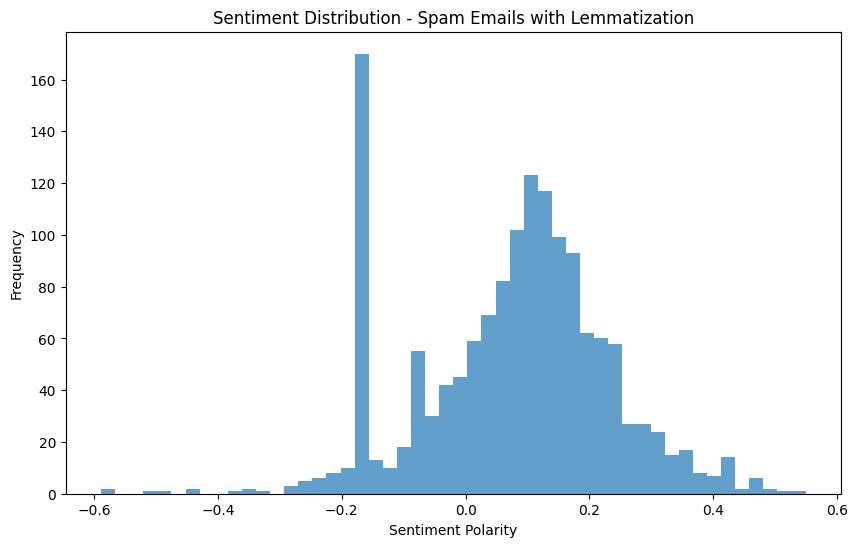

[-0.16666666666666666, -0.0029166666666666646, -0.05555555555555555, -0.09333333333333331, 0.03333333333333333, -0.019999999999999997, -0.08333333333333333, -0.033333333333333326, 0.11805555555555557, 0.15386742424242425]


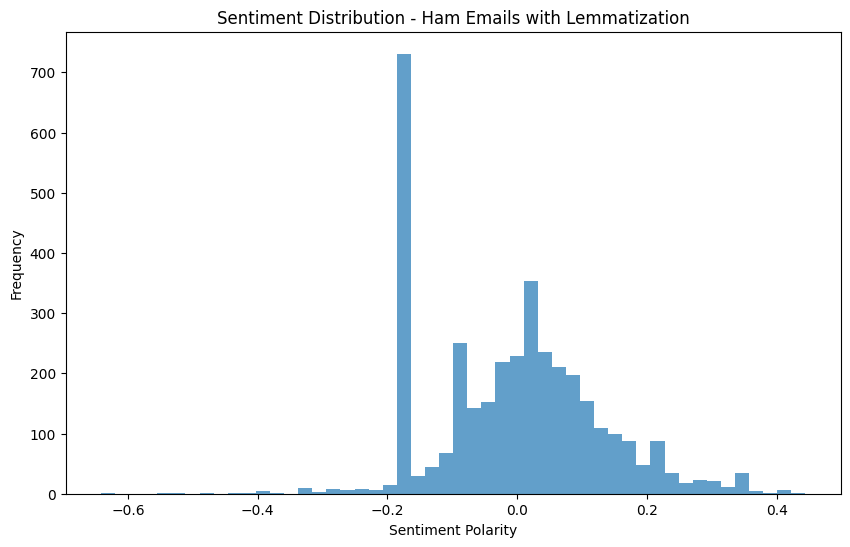

[-0.06515151515151515, 0.03333333333333334, 0.08409090909090909, 0.007217261904761907, 0.03614718614718614, -0.20833333333333331, 0.0773809523809524, 0.275, 0.14840159840159842, 0.07121212121212121]


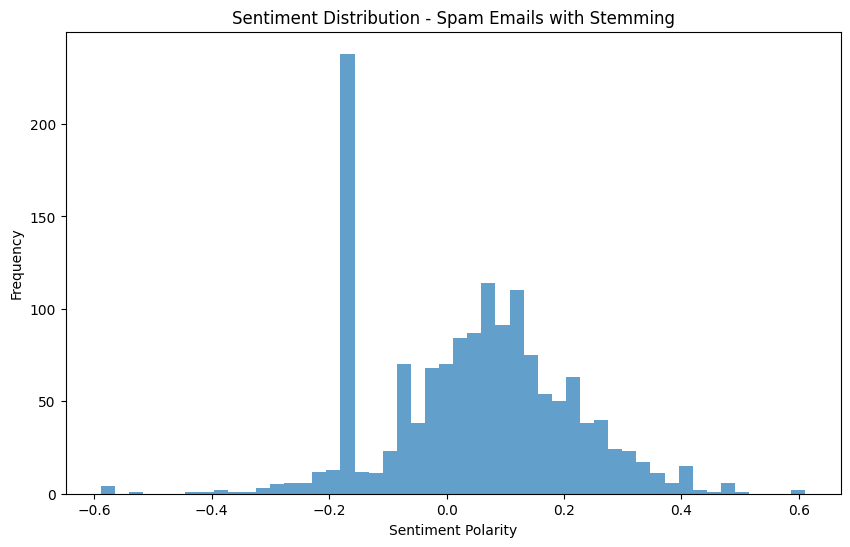

[-0.16666666666666666, -0.05095238095238095, -0.16666666666666666, -0.16666666666666666, 0.0, -0.08333333333333333, -0.16666666666666666, -0.16666666666666666, -0.041666666666666664, 0.17387205387205387]


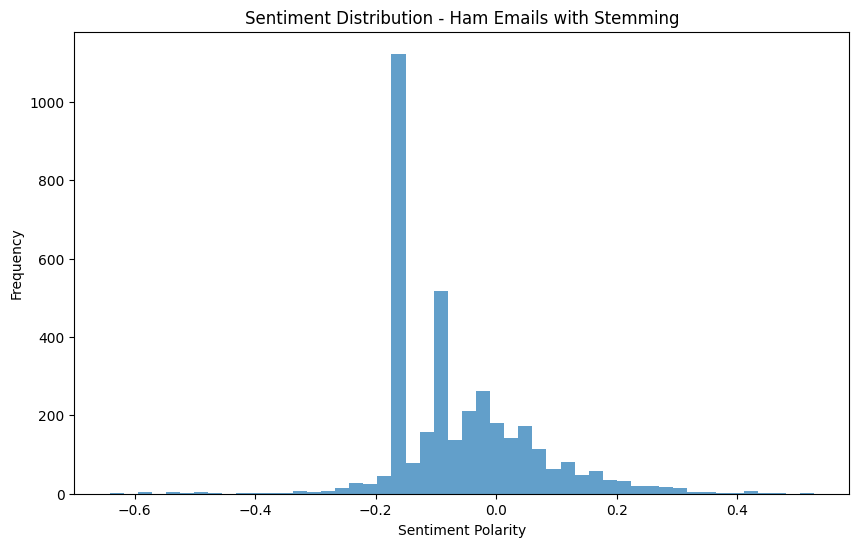

[0.03248106060606061, 0.18148148148148147, 0.1672727272727273, 0.13746031746031748, 0.10553030303030303, -0.20833333333333331, 0.15000000000000002, 0.40769230769230774, 0.17426788897377132, 0.053447742733457024]


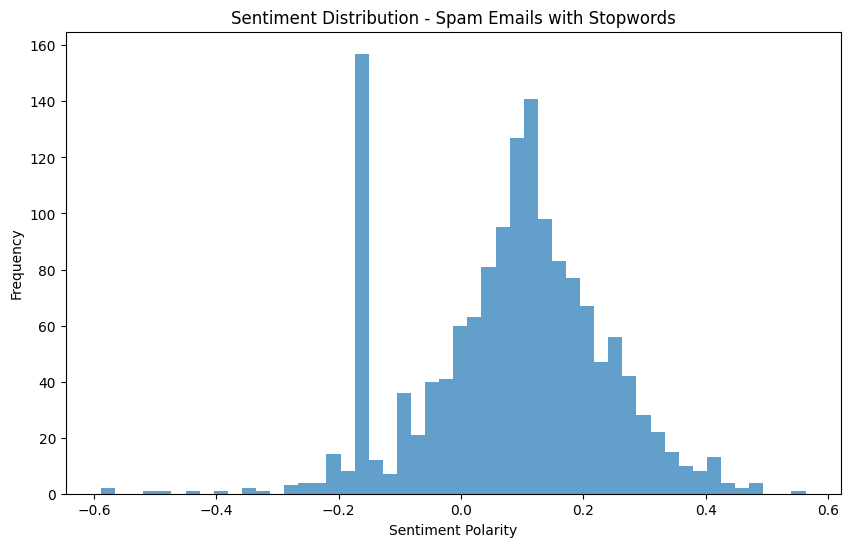

[-0.16666666666666666, -0.0029166666666666646, -0.05555555555555555, -0.09333333333333331, 0.03333333333333333, -0.019999999999999997, -0.08333333333333333, -0.033333333333333326, 0.16354166666666667, 0.11423254281949935]


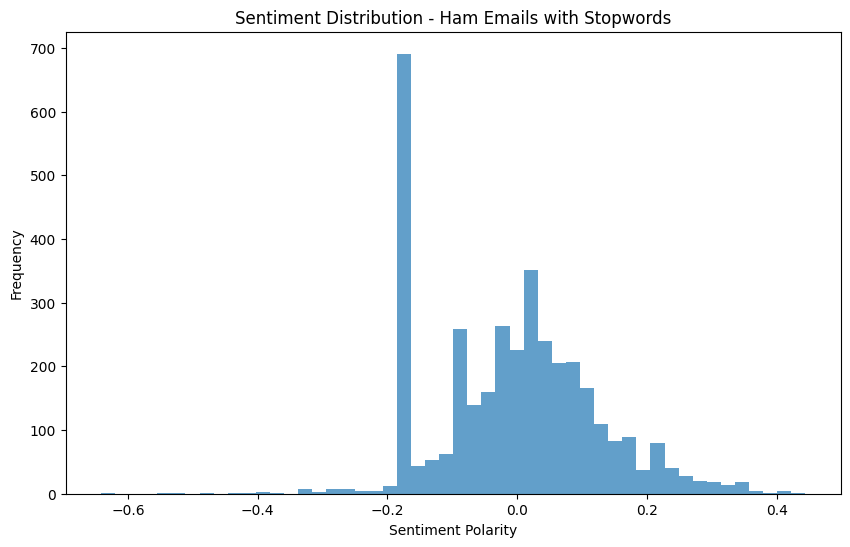

In [21]:
from textblob import TextBlob

def plot_sentiment(emails, title):
    sentiments = [TextBlob(email).sentiment.polarity for email in emails]
    print(sentiments)
    plt.figure(figsize=(10, 6))
    plt.hist(sentiments, bins=50, alpha=0.7)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment Distribution - {title}')
    plt.show()

plot_sentiment(spam_emails_lem, "Spam Emails with Lemmatization")
plot_sentiment(ham_emails_lem, "Ham Emails with Lemmatization")
plot_sentiment(spam_emails_stem, "Spam Emails with Stemming")
plot_sentiment(ham_emails_stem, "Ham Emails with Stemming")
plot_sentiment(spam_emails_keep_stopwords, "Spam Emails with Stopwords")
plot_sentiment(ham_emails_keep_stopwords, "Ham Emails with Stopwords")


Remove irrelevant words

most_common_words [('company', 921), ('price', 716), ('information', 521), ('email', 512), ('get', 499), ('statement', 497), ('please', 485), ('u', 470), ('stock', 466), ('new', 434), ('may', 423), ('time', 410), ('security', 410), ('one', 405), ('product', 389), ('pill', 357), ('investment', 320), ('free', 314), ('service', 297), ('money', 295), ('report', 295), ('business', 293), ('offer', 277), ('need', 268), ('inc', 268), ('online', 257), ('click', 257), ('day', 257), ('looking', 254), ('best', 254), ('mail', 248), ('contact', 246), ('like', 244), ('computron', 242), ('want', 241), ('go', 236), ('future', 232), ('sale', 229), ('million', 227), ('market', 224)]


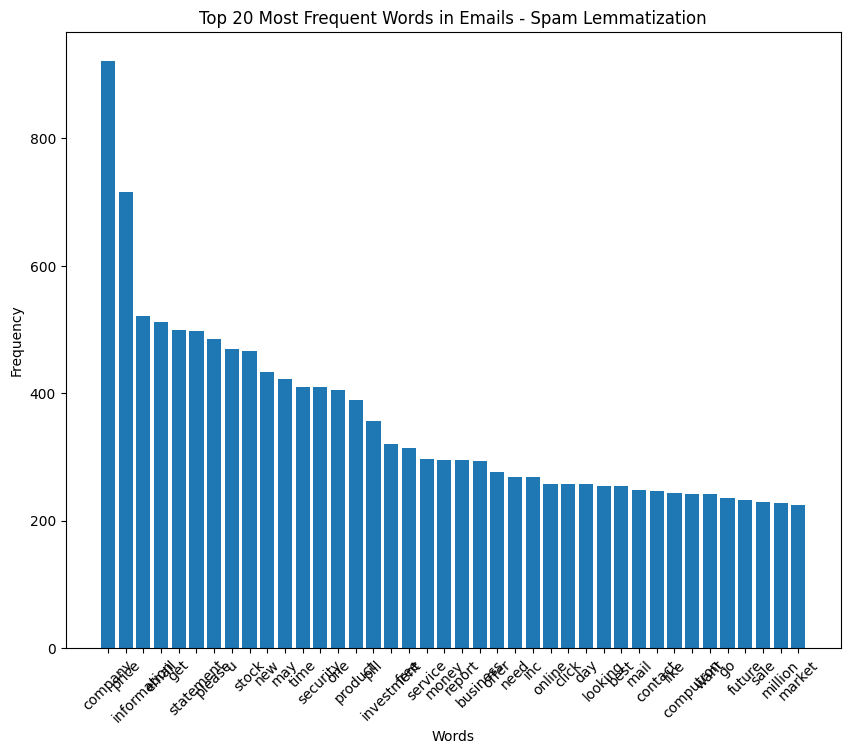

most_common_words [('enron', 6555), ('deal', 3534), ('gas', 2861), ('please', 2715), ('meter', 2713), ('cc', 2379), ('pm', 2325), ('hpl', 2318), ('daren', 1901), ('thanks', 1813), ('corp', 1710), ('volume', 1667), ('need', 1578), ('know', 1452), ('mmbtu', 1349), ('forwarded', 1296), ('day', 1292), ('farmer', 1139), ('contract', 1120), ('let', 1100), ('attached', 1083), ('change', 1050), ('xl', 1035), ('see', 1020), ('new', 1003), ('may', 961), ('month', 937), ('robert', 891), ('would', 875), ('question', 867), ('sitara', 861), ('nom', 831), ('ticket', 827), ('get', 822), ('price', 808), ('nomination', 801), ('texas', 796), ('sale', 766), ('pec', 752), ('ena', 732)]


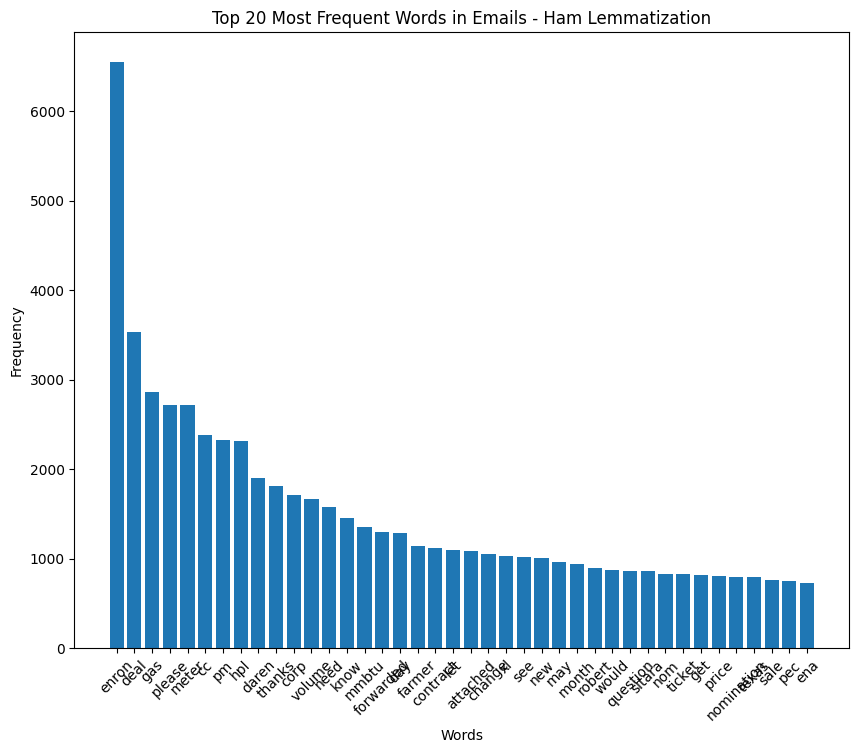

In [22]:
# Define a static list of words to remove
words_to_remove = ['subject', 'hou','com', 'http', 'ect','www', 'u', 'e', 'p', 'td', 'c', 'j', 'l', 'b', 'r', 'nbsp', 'font', 'size', 'width', 'height', 'within', 'message', 'align', 'center', 'html', 'table', 'tr', 'align', 'center', 'href', 'src', 'img', 'style', 'alt', 'title', 'bgcolor']

# Preprocess spam and ham emails
def preprocess_emails(emails):
    preprocessed_emails = []
    for email in emails:
        # Convert to lowercase
        email = email.lower()
        # Remove URLs, symbols, and numbers
        email = re.sub(r'https?://\S+|www\.\S+', '', email)
        email = re.sub(r'<.*?>+', '', email)
        email = re.sub(r'[^a-z\s]', '', email)
        # Tokenize
        tokens = word_tokenize(email)
        # Remove stopwords and words to remove
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words and word not in words_to_remove]
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        preprocessed_emails.append(' '.join(lemmatized_tokens))
    return preprocessed_emails

spam_emails_lem_removal = preprocess_emails(spam_emails)
ham_emails_lem_removal = preprocess_emails(ham_emails)

# Function to plot most common words
def plot_most_common_words(emails, title):
    all_words = ' '.join(emails).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(40)
    print("most_common_words", most_common_words)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.title(f'Top 20 Most Frequent Words in Emails - {title}')
    plt.show()

# Plotting for each preprocessing strategy
plot_most_common_words(spam_emails_lem_removal, "Spam Lemmatization")
plot_most_common_words(ham_emails_lem_removal, "Ham Lemmatization")


Step 2: Feature Engineering <br>
2.1 Creating Bag-of-Words Features 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

emails_lem = spam_emails_lem + ham_emails_lem
emails_stem = spam_emails_stem + ham_emails_stem
emails_keep_stopwords = spam_emails_keep_stopwords + ham_emails_keep_stopwords
emails_lem_removal = spam_emails_lem_removal + ham_emails_lem_removal

# Create the vectorizer labels
labels_lem = [1] * len(spam_emails_lem) + [0] * len(ham_emails_lem)  # Assuming spam_emails and ham_emails were the original lists
labels_stem = [1] * len(spam_emails_stem) + [0] * len(ham_emails_stem)
labels_keep_stopwords = [1] * len(spam_emails_keep_stopwords) + [0] * len(ham_emails_keep_stopwords)

labels_lem_removal = [1] * len(spam_emails_lem_removal) + [0] * len(ham_emails_lem_removal)  # Assuming spam_emails and ham_emails were the original lists



In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.classify import NaiveBayesClassifier
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
from sklearn.model_selection import train_test_split
from collections import defaultdict
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from nltk import classify

# Assume emails_lem, emails_stem, emails_keep_stopwords and their labels are already defined.

def create_features_from_bow(X, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    featuresets = []
    for email_vector in X:
        features = {feature_names[i]: email_vector[i] for i in range(len(feature_names)) if email_vector[i] > 0}
        featuresets.append(features)
    return featuresets

def evaluate_nltk_naive_bayes(featuresets, labels):
    # Split the data into training and test sets
    train_featuresets, test_featuresets, train_labels, test_labels = train_test_split(featuresets, labels, test_size=0.25, random_state=42)
    
    # Train the Naive Bayes classifier
    train_set = list(zip(train_featuresets, train_labels))
    classifier = NaiveBayesClassifier.train(train_set)
    
    # Evaluate the classifier
    test_set = list(zip(test_featuresets, test_labels))
    accuracy = nltk.classify.accuracy(classifier, test_set)
    
    # Calculate precision, recall, and F1 for each label
    refsets = defaultdict(set)
    testsets = defaultdict(set)

    for i, (feats, label) in enumerate(test_set):
        refsets[label].add(i)
        observed = classifier.classify(feats)
        testsets[observed].add(i)
    
    for label in classifier.labels():
        print(f"Label: {label}")
        print(f"Precision: {precision(refsets[label], testsets[label])}")
        print(f"Recall: {recall(refsets[label], testsets[label])}")
        print(f"F1: {f_measure(refsets[label], testsets[label])}")
        print()


# Example for emails_lem
vectorizer_lem = CountVectorizer(max_features=1000)
X_bow_lem = vectorizer_lem.fit_transform(emails_lem).toarray()
featuresets_lem = create_features_from_bow(X_bow_lem, vectorizer_lem)

print("Evaluating Lemmatization Strategy with BOW:")
evaluate_nltk_naive_bayes(featuresets_lem, labels_lem)


vectorize_stem = CountVectorizer(max_features=1000)
X_bow_stem = vectorize_stem.fit_transform(emails_stem).toarray()
featuresets_stem = create_features_from_bow(X_bow_stem, vectorize_stem)
print("Evaluating Stemming Strategy with BOW:")
evaluate_nltk_naive_bayes(featuresets_stem, labels_stem)

vectorize_keep_stopwords = CountVectorizer(max_features=1000)
X_bow_keep_stopwords = vectorize_keep_stopwords.fit_transform(emails_keep_stopwords).toarray()
featuresets_keep_stopwords = create_features_from_bow(X_bow_keep_stopwords, vectorize_keep_stopwords)
print("Evaluating Keep Stopwords Strategy with BOW:")
evaluate_nltk_naive_bayes(featuresets_keep_stopwords, labels_keep_stopwords)


vectorize_lem_removal = CountVectorizer(max_features=1000)
X_bow_lem_removal = vectorize_lem_removal.fit_transform(emails_lem_removal).toarray()
featuresets_lem_removal = create_features_from_bow(X_bow_lem_removal, vectorize_lem_removal)
print("Evaluating Lemmatization with Removal Strategy with BOW:")
evaluate_nltk_naive_bayes(featuresets_lem_removal, labels_lem_removal)




Evaluating Lemmatization Strategy with BOW:
Label: 0
Precision: 0.9687137891077636
Recall: 0.9330357142857143
F1: 0.9505400795906764

Label: 1
Precision: 0.8604651162790697
Recall: 0.9319899244332494
F1: 0.8948004836759371

Evaluating Stemming Strategy with BOW:
Label: 0
Precision: 0.9753810082063306
Recall: 0.9285714285714286
F1: 0.9514008004574042

Label: 1
Precision: 0.8545454545454545
Recall: 0.947103274559194
F1: 0.8984468339307048

Evaluating Keep Stopwords Strategy with BOW:
Label: 0
Precision: 0.9745664739884393
Recall: 0.9408482142857143
F1: 0.9574105621805793

Label: 1
Precision: 0.8761682242990654
Recall: 0.9445843828715366
F1: 0.9090909090909091

Evaluating Lemmatization with Removal Strategy with BOW:
Label: 0
Precision: 0.9625
Recall: 0.9453125
F1: 0.9538288288288289

Label: 1
Precision: 0.8813559322033898
Recall: 0.9168765743073047
F1: 0.8987654320987654



Create TFIDF Features

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Function to create featuresets from TF-IDF vectorized data
def create_featuresets_from_tfidf(X_tfidf, vectorizer, labels):
    feature_names = vectorizer.get_feature_names_out()
    featuresets = [({feature_names[i]: doc_vector[i] for i in range(len(feature_names)) if doc_vector[i] > 0}, label) for doc_vector, label in zip(X_tfidf, labels)]
    return featuresets

# Function to evaluate with detailed metrics
def evaluate_nltk_classifier_with_metrics(featuresets):
    # Splitting the data
    train_featuresets, test_featuresets = train_test_split(featuresets, test_size=0.25, random_state=42)
    
    # Training the classifier
    classifier = NaiveBayesClassifier.train(train_featuresets)
    
    # Predicting the labels
    predicted_labels = [classifier.classify(feat) for feat, _ in test_featuresets]
    
    # Extracting true labels
    true_labels = [label for _, label in test_featuresets]
    
    # Calculating metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
    
    # Printing metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Creating TF-IDF features for each preprocessing strategy
tfidf_vectorizer_lem = TfidfVectorizer(max_features=1000)
X_tfidf_lem = tfidf_vectorizer_lem.fit_transform(emails_lem).toarray()
featuresets_lem = create_featuresets_from_tfidf(X_tfidf_lem, tfidf_vectorizer_lem, labels_lem)

tfidf_vectorizer_stem = TfidfVectorizer(max_features=1000)
X_tfidf_stem = tfidf_vectorizer_stem.fit_transform(emails_stem).toarray()
featuresets_stem = create_featuresets_from_tfidf(X_tfidf_stem, tfidf_vectorizer_stem, labels_stem)

tfidf_vectorizer_keep_stopwords = TfidfVectorizer(max_features=1000)
X_tfidf_keep_stopwords = tfidf_vectorizer_keep_stopwords.fit_transform(emails_keep_stopwords).toarray()
featuresets_keep_stopwords = create_featuresets_from_tfidf(X_tfidf_keep_stopwords, tfidf_vectorizer_keep_stopwords, labels_keep_stopwords)

# Evaluating models
print("Evaluating Lemmatization Strategy with TF-IDF:")
evaluate_nltk_classifier_with_metrics(featuresets_lem)

print("\nEvaluating Stemming Strategy with TF-IDF:")
evaluate_nltk_classifier_with_metrics(featuresets_stem)

print("\nEvaluating Keeping Stopwords Strategy with TF-IDF:")
evaluate_nltk_classifier_with_metrics(featuresets_keep_stopwords)


Evaluating Lemmatization Strategy with TF-IDF:
Accuracy: 0.4548
Precision: 0.8036
Recall: 0.4548
F1 Score: 0.4062

Evaluating Stemming Strategy with TF-IDF:
Accuracy: 0.4548
Precision: 0.8036
Recall: 0.4548
F1 Score: 0.4062

Evaluating Keeping Stopwords Strategy with TF-IDF:
Accuracy: 0.4540
Precision: 0.8035
Recall: 0.4540
F1 Score: 0.4050


# Section 3 <br>
A. Basic Experiments

Representing negation:

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.classify import NaiveBayesClassifier
from nltk.metrics.scores import precision, recall, f_measure
from collections import defaultdict
from nltk.tokenize import word_tokenize

# Negation handling function
def add_negation_suffix(email):
    negation_words = ['not', 'no', 'never', "n't", "isn't", "wasn't", "don't", "didn't"]
    tokens = word_tokenize(email)
    negated = False
    result = []
    punctuation = ['.', ',', '!', '?']
    for token in tokens:
        if token in negation_words:
            negated = True
        elif token in punctuation:
            negated = False
        elif negated:
            token += '_NEG'
        result.append(token)
    return ' '.join(result)

# Applying negation handling to emails
emails_neg_lem = [add_negation_suffix(email) for email in emails_lem]
emails_neg_stem = [add_negation_suffix(email) for email in emails_stem]
emails_neg_keep_stopwords = [add_negation_suffix(email) for email in emails_keep_stopwords]

# Function to create bag-of-words features
def create_bow_features(emails):
    vectorizer = CountVectorizer(max_features=1000)
    X_bow = vectorizer.fit_transform(emails).toarray()
    return X_bow, vectorizer

# Convert NumPy array to dictionary format
def array_to_dict(features):
    return [{str(i): val for i, val in enumerate(feature)} for feature in features]

\
# Function to evaluate model with detailed metrics
def evaluate_model_with_detailed_metrics(X_bow, labels):
    # Convert NumPy array to dictionary format
    X_bow_dict = array_to_dict(X_bow)
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X_bow_dict, labels, test_size=0.25, random_state=42)
    
    # Training the Naive Bayes classifier
    classifier = NaiveBayesClassifier.train(zip(X_train, y_train))
    
    # Testing the classifier
    y_pred = [classifier.classify(features) for features in X_test]
    
    # Calculating evaluation metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Printing evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Creating bag-of-words features for negation-handled emails
X_bow_neg_lem, vectorizer_neg_lem = create_bow_features(emails_neg_lem)
X_bow_neg_stem, vectorizer_neg_stem = create_bow_features(emails_neg_stem)
X_bow_neg_keep_stopwords, vectorizer_neg_keep_stopwords = create_bow_features(emails_neg_keep_stopwords)

# Evaluating models with negation suffix
print("Evaluating Lemmatization Strategy with BOW and Negation Suffix:")
evaluate_model_with_detailed_metrics(X_bow_neg_lem, labels_lem)
print("\nEvaluating Stemming Strategy with BOW and Negation Suffix:")
evaluate_model_with_detailed_metrics(X_bow_neg_stem, labels_stem)
print("\nEvaluating Keeping Stopwords Strategy with BOW and Negation Suffix:")
evaluate_model_with_detailed_metrics(X_bow_neg_keep_stopwords, labels_keep_stopwords)


Evaluating Lemmatization Strategy with BOW and Negation Suffix:
Accuracy: 0.9474
Precision: 0.9544
Recall: 0.9474
F1 Score: 0.9484

Evaluating Stemming Strategy with BOW and Negation Suffix:
Accuracy: 0.9397
Precision: 0.9443
Recall: 0.9397
F1 Score: 0.9406

Evaluating Keeping Stopwords Strategy with BOW and Negation Suffix:
Accuracy: 0.9420
Precision: 0.9512
Recall: 0.9420
F1 Score: 0.9432


2. Adding Sentiment Scores with TextBlob

In [54]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk import classify
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import numpy as np

# Function to convert numpy array to dictionary
def array_to_dict(arr):
    return {str(i): val for i, val in enumerate(arr)}

# Function to evaluate model with detailed metrics
def evaluate_model_with_detailed_metrics(X_combined, labels):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X_combined, labels, test_size=0.25, random_state=42)
    
    # Converting numpy arrays to dictionaries
    X_train_dict = [array_to_dict(features) for features in X_train]
    X_test_dict = [array_to_dict(features) for features in X_test]
    
    # Training the Naive Bayes classifier
    classifier = NaiveBayesClassifier.train(zip(X_train_dict, y_train))
    
    # Testing the classifier
    y_pred = [classifier.classify(features) for features in X_test_dict]
    
    # Calculating evaluation metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Printing evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Example code for adding sentiment scores to emails
def add_sentiment_scores(emails):
    return [TextBlob(email).sentiment.polarity for email in emails]

sentiment_scores_lem = add_sentiment_scores(emails_lem)
sentiment_scores_stem = add_sentiment_scores(emails_stem)
sentiment_scores_keep_stopwords = add_sentiment_scores(emails_keep_stopwords)

print("sentiment_scores_lem: ", sentiment_scores_lem[:2])
print("sentiment_scores_stem: ", sentiment_scores_stem[:2])
print("sentiment_scores_keep_stopwords: ", sentiment_scores_keep_stopwords[:2])

# Evaluate models with sentiment scores
print("Evaluating Lemmatization Strategy with BOW and Sentiment Scores:")
evaluate_model_with_detailed_metrics(np.column_stack((X_bow_lem, sentiment_scores_lem)), labels_lem)
print("\nEvaluating Stemming Strategy with BOW and Sentiment Scores:")
evaluate_model_with_detailed_metrics(np.column_stack((X_bow_stem, sentiment_scores_stem)), labels_stem)
print("\nEvaluating Keeping Stopwords Strategy with BOW and Sentiment Scores:")
evaluate_model_with_detailed_metrics(np.column_stack((X_bow_keep_stopwords, sentiment_scores_keep_stopwords)), labels_keep_stopwords)


sentiment_scores_lem:  [-0.012878787878787875, 0.17916666666666667]
sentiment_scores_stem:  [-0.06515151515151515, 0.03333333333333334]
sentiment_scores_keep_stopwords:  [0.03248106060606061, 0.18148148148148147]
Evaluating Lemmatization Strategy with BOW and Sentiment Scores:
Accuracy: 0.9466
Precision: 0.9538
Recall: 0.9466
F1 Score: 0.9477

Evaluating Stemming Strategy with BOW and Sentiment Scores:
Accuracy: 0.9366
Precision: 0.9399
Recall: 0.9366
F1 Score: 0.9373

Evaluating Keeping Stopwords Strategy with BOW and Sentiment Scores:
Accuracy: 0.9443
Precision: 0.9529
Recall: 0.9443
F1 Score: 0.9455


3. Varying Vocabulary Sizes

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

def create_bow_features_with_different_vocab(emails, max_features):
    vectorizer = CountVectorizer(max_features=max_features)
    X_bow = vectorizer.fit_transform(emails).toarray()
    return X_bow, vectorizer.get_feature_names_out()

# Experiment with different vocabulary sizes
X_bow_small_vocab_lem, features_small_lem = create_bow_features_with_different_vocab(emails_lem, max_features=500)
X_bow_large_vocab_lem, features_large_lem = create_bow_features_with_different_vocab(emails_lem, max_features=2000)

X_bow_small_vocab_stem, features_small_stem = create_bow_features_with_different_vocab(emails_stem, max_features=500)
X_bow_large_vocab_stem, features_large_stem = create_bow_features_with_different_vocab(emails_stem, max_features=2000)

X_bow_small_vocab_keep_stopwords, features_small_keep_stopwords = create_bow_features_with_different_vocab(emails_keep_stopwords, max_features=500)
X_bow_large_vocab_keep_stopwords, features_large_keep_stopwords = create_bow_features_with_different_vocab(emails_keep_stopwords, max_features=2000)

# Evaluate models for Bag-of-Words features with different vocabulary sizes
print("Evaluating Lemmatization Strategy with BOW (small vocab):")
evaluate_model_with_detailed_metrics(X_bow_small_vocab_lem, labels_lem)
print("\nEvaluating Lemmatization Strategy with BOW (large vocab):")
evaluate_model_with_detailed_metrics(X_bow_large_vocab_lem, labels_lem)
print("\nEvaluating Stemming Strategy with BOW (small vocab):")
evaluate_model_with_detailed_metrics(X_bow_small_vocab_stem, labels_stem)
print("\nEvaluating Stemming Strategy with BOW (large vocab):")
evaluate_model_with_detailed_metrics(X_bow_large_vocab_stem, labels_stem)
print("\nEvaluating Keeping Stopwords Strategy with BOW (small vocab):")
evaluate_model_with_detailed_metrics(X_bow_small_vocab_keep_stopwords, labels_keep_stopwords)
print("\nEvaluating Keeping Stopwords Strategy with BOW (large vocab):")
evaluate_model_with_detailed_metrics(X_bow_large_vocab_keep_stopwords, labels_keep_stopwords)


Evaluating Lemmatization Strategy with BOW (small vocab):
Accuracy: 0.9296
Precision: 0.9423
Recall: 0.9296
F1 Score: 0.9313

Evaluating Lemmatization Strategy with BOW (large vocab):
Accuracy: 0.9312
Precision: 0.9325
Recall: 0.9312
F1 Score: 0.9316

Evaluating Stemming Strategy with BOW (small vocab):
Accuracy: 0.9296
Precision: 0.9423
Recall: 0.9296
F1 Score: 0.9313

Evaluating Stemming Strategy with BOW (large vocab):
Accuracy: 0.9142
Precision: 0.9142
Recall: 0.9142
F1 Score: 0.9142

Evaluating Keeping Stopwords Strategy with BOW (small vocab):
Accuracy: 0.9343
Precision: 0.9454
Recall: 0.9343
F1 Score: 0.9358

Evaluating Keeping Stopwords Strategy with BOW (large vocab):
Accuracy: 0.9412
Precision: 0.9433
Recall: 0.9412
F1 Score: 0.9418


4. POS Tag Frequencies as Features


In [10]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from collections import Counter
import numpy as np

# Function to extract POS tag features from emails
def get_pos_tag_features(emails):
    pos_tag_features = []
    for email in emails:
        tokens = word_tokenize(email)
        tagged_tokens = pos_tag(tokens)
        tag_freq = Counter(tag for word, tag in tagged_tokens)
        pos_tag_features.append(tag_freq)
    return pos_tag_features

# Function to create featuresets from POS tag features
def create_featuresets_from_pos_tag(pos_features):
    featuresets = []
    for pos_freq in pos_features:
        featuresets.append(dict(pos_freq))
    return featuresets

pos_features_lem = get_pos_tag_features(emails_lem)
pos_features_stem = get_pos_tag_features(emails_stem)
pos_features_keep_stopwords = get_pos_tag_features(emails_keep_stopwords)

# Convert POS tag features to featuresets
pos_featuresets_lem = create_featuresets_from_pos_tag(pos_features_lem)
pos_featuresets_stem = create_featuresets_from_pos_tag(pos_features_stem)
pos_featuresets_keep_stopwords = create_featuresets_from_pos_tag(pos_features_keep_stopwords)

# Evaluate models for POS tag features
print("Evaluating Lemmatization Strategy with POS Tag Features:")
evaluate_model_with_detailed_metrics(pos_featuresets_lem, labels_lem)
print("\nEvaluating Stemming Strategy with POS Tag Features:")
evaluate_model_with_detailed_metrics(pos_featuresets_stem, labels_stem)
print("\nEvaluating Keeping Stopwords Strategy with POS Tag Features:")
evaluate_model_with_detailed_metrics(pos_featuresets_keep_stopwords, labels_keep_stopwords)


Evaluating Lemmatization Strategy with POS Tag Features:
Accuracy: 0.7324
Precision: 0.7175
Recall: 0.7324
F1 Score: 0.7199

Evaluating Stemming Strategy with POS Tag Features:
Accuracy: 0.7254
Precision: 0.7249
Recall: 0.7254
F1 Score: 0.7252

Evaluating Keeping Stopwords Strategy with POS Tag Features:
Accuracy: 0.7641
Precision: 0.7793
Recall: 0.7641
F1 Score: 0.7691


# Combination of features

In [53]:
import re
import nltk
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer  

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from collections import Counter
from sklearn.metrics import f1_score  


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocess emails: lowercasing, tokenizing, removing stopwords and lemmatizing
def preprocess_text(email):
    email = email.lower()
    email = re.sub(r'https?://\S+|www\.\S+', '', email)
    email = re.sub(r'<.*?>+', '', email)
    email = re.sub(r'[^a-z\s]', '', email)
    tokens = word_tokenize(email)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Function to detect negation and append "_NEG" suffix to words following a negation word until punctuation
def add_negation_suffix(email):
    negation_words = ['not', 'no', 'never', "n't", 'isnt', 'wasnt', 'dont', 'didnt']
    tokens = word_tokenize(email)
    negated = False
    result = []
    punctuation = ['.', ',', '!', '?', ';', ':']
    for token in tokens:
        if token in negation_words:
            negated = True
        elif token in punctuation:
            negated = False
        elif negated:
            token += '_NEG'
        result.append(token)
    return ' '.join(result)

# Function to get sentiment scores
def get_sentiment_scores(emails):
    return np.array([TextBlob(email).sentiment.polarity for email in emails])

# Function to get POS tag features
def get_pos_tags_features(emails):  
    all_tags = []  
    for email in emails:  
        tokens = word_tokenize(email)  
        tagged_tokens = pos_tag(tokens)  
        all_tags.append([tag for word, tag in tagged_tokens])  
      
    # Flatten the list of all tags to find the unique set of POS tags  
    unique_tags = set([tag for sublist in all_tags for tag in sublist])  
      
    # Use MultiLabelBinarizer to convert the list of tags into a binary matrix  
    mlb = MultiLabelBinarizer(classes=sorted(unique_tags))  
    pos_features = mlb.fit_transform(all_tags)  
      
    return pos_features  

def add_negation_suffix(email):
    negation_words = {'not', 'no', "n't", 'never'}
    punctuation = {'.', ',', '!', '?'}
    transformed = []
    negated = False
    for token in word_tokenize(email):
        if token in punctuation:
            negated = False
        elif negated:
            token += '_NEG'
        elif token in negation_words:
            negated = True
        transformed.append(token)
    return ' '.join(transformed)

# Function to generate negation features based on the count of negated words
def get_negation_features(emails):
    emails_with_negation = [add_negation_suffix(email) for email in emails]
    negation_counts = [email.count('_NEG') for email in emails_with_negation]
    return np.array(negation_counts).reshape(-1, 1)

# Function to create BoW features with different vocab sizes
def create_bow_features_with_different_vocab(emails, max_features):
    vectorizer = CountVectorizer(max_features=max_features)
    X_bow = vectorizer.fit_transform(emails).toarray()
    return X_bow, vectorizer.get_feature_names_out()

# Similar function for TF-IDF
def create_tfidf_features_with_different_vocab(emails, max_features):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X_tfidf = vectorizer.fit_transform(emails).toarray()
    return X_tfidf, vectorizer.get_feature_names_out()


# Combine spam and ham emails and labels
emails = spam_emails + ham_emails
labels = np.array([1] * len(spam_emails) + [0] * len(ham_emails))

# Preprocess emails
emails_processed = [preprocess_text(email) for email in emails]

# Additional features
sentiment_scores = get_sentiment_scores(emails_processed).reshape(-1, 1)
sentiment_scores = (sentiment_scores + 1) / 2  # Now ranges from 0 to 1  

negation_features = get_negation_features(emails_processed)
pos_tags_features = get_pos_tags_features(emails_processed)

# Function to create features with different vocabulary sizes for BoW and TF-IDF
def create_features_with_different_vocab(emails_processed, max_features, use_tfidf=False):
    if use_tfidf:
        vectorizer = TfidfVectorizer(max_features=max_features)
    else:
        vectorizer = CountVectorizer(max_features=max_features)
    
    X = vectorizer.fit_transform(emails_processed).toarray()
    return X, vectorizer.get_feature_names_out()

  
# Function to train and evaluate the model  
def train_and_evaluate(X, y):  
    # Split the data into training and test sets  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  
      
    # Initialize and train the Naive Bayes classifier  
    clf = MultinomialNB()  
    clf.fit(X_train, y_train)  
      
    # Make predictions on the test set  
    y_pred = clf.predict(X_test)  
      
    # Print evaluation metrics  
    print("Accuracy:", accuracy_score(y_test, y_pred))  
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))  # Print F1 score  
    print(classification_report(y_test, y_pred))  
  
# Example usage for creating features and training models with different vocab sizes  
vocab_sizes = [500, 1000, 2000]  # Different vocabulary sizes to explore  
  
# ... (previous code remains unchanged)  
  
# Example usage for creating features and training models with different vocab sizes  
vocab_sizes = [500, 1000, 2000]  # Different vocabulary sizes to explore  
  
for vocab_size in vocab_sizes:  
    X_bow, _ = create_features_with_different_vocab(emails_processed, max_features=vocab_size, use_tfidf=False)  
    X_tfidf, _ = create_features_with_different_vocab(emails_processed, max_features=vocab_size, use_tfidf=True)  
  
    # Generate additional features  
    sentiment_scores = get_sentiment_scores(emails_processed).reshape(-1, 1)  
    # Scale sentiment scores to be non-negative  
    sentiment_scores = (sentiment_scores + 1) / 2  # Now ranges from 0 to 1  
    negation_features = get_negation_features(emails_processed)  
    pos_tags_features = get_pos_tags_features(emails_processed)  # Now returns a NumPy array  
  
    # Define feature combinations  
    features_combinations = {  
        "BoW with Sentiment, Negation, and POS": np.hstack((X_bow, sentiment_scores, negation_features, pos_tags_features)),  
        "BoW with Sentiment and POS": np.hstack((X_bow, sentiment_scores, pos_tags_features)),  
        "BoW with Sentiment and Negation": np.hstack((X_bow, sentiment_scores, negation_features)),  
        "BoW with Negation and POS": np.hstack((X_bow, negation_features, pos_tags_features)),  
        "TF-IDF with Sentiment, Negation, and POS": np.hstack((X_tfidf, sentiment_scores, negation_features, pos_tags_features)),  
        "TF-IDF with Sentiment and POS": np.hstack((X_tfidf, sentiment_scores, pos_tags_features)),  
        "TF-IDF with Sentiment and Negation": np.hstack((X_tfidf, sentiment_scores, negation_features)),  
        "TF-IDF with Negation and POS": np.hstack((X_tfidf, negation_features, pos_tags_features))  
    }  
  
    # Evaluate models for each feature combination  
    for description, features in features_combinations.items():  
        # Check if there are any negative values in the features  
        if (features < 0).any():  
            raise ValueError(f"Negative values found in features for {description}")  
        print(f"Evaluating {description} with vocab size {vocab_size}:")  
        train_and_evaluate(features, labels)  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\btindol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Evaluating BoW with Sentiment, Negation, and POS with vocab size 500:
Accuracy: 0.9280742459396751
F1 Score: 0.9291913075677065
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       896
           1       0.84      0.95      0.89       397

    accuracy                           0.93      1293
   macro avg       0.91      0.93      0.92      1293
weighted avg       0.93      0.93      0.93      1293

Evaluating BoW with Sentiment and POS with vocab size 500:
Accuracy: 0.9273008507347255
F1 Score: 0.928523079316301
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       896
           1       0.83      0.95      0.89       397

    accuracy                           0.93      1293
   macro avg       0.91      0.93      0.92      1293
weighted avg       0.93      0.93      0.93      1293

Evaluating BoW with Sentiment and Negation with vocab size 500:
Accuracy: 0.922660479505027
F1 Score: 